<table class="table table-bordered">
    <tr>
        <th style="width:200px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png?width=3522&height=1986&name=RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png' style="background-color:black; width: 100%; height: 100%;">
        </th>
        <th style="text-align:center;">
            <h1>RISE2.0 Business and Data Analytics</h1>
            <h2>IU 3.4 Data Analytics with Pandas </h2>
        </th>
    </tr>
</table>

# Learning Objectives
#### After completing this lesson, you should be able to:

1. LO1 : Understand Pandas Data Manipulation
2. LO2 : Understand Pandas Functions
3. LO3 : Apply Data Manipulation using various Python Functions




# Table of Contents <a id='tc'></a>

1. [Python Functions: Pandas Data Manipulation](#p1)
2. [[Optional] Hands-On Practice Exercise](#p3)


# 1. Python Functions: Pandas Data Manipulation <a id='p1' />


## 1.1 Replacing missing values

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/weather_data_missing_replace.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In this data, although we don't seem to have missing values as such but some numbers like `-99999` meaningless. We can proceed to convert these values to be nulls instead. So, that these special values are identified as nulls and we can handle them as required. 

In [3]:
new_df = df.replace(-99999,np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [4]:
# If there are multiple special values, you can pass a list of these special values that you need to replace with NaN.

new_df = df.replace([-99999,-88888],np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [5]:
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


After further inspection of the data, we can identify that there are some event with a 0 value. Actually, they are missings too.
Here, we will try to replace the special values in **temperature** and **windspeed** column and replace the 0 in **event** column.

In [6]:
new_df = df.replace({
    'temperature':-99999,
    'windspeed':-99999,
    'event':'0'
},np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


Let's load another data. Here, we want to replace a list of values with another list of values.

In [9]:
listDF = pd.DataFrame({
        'score':['exceptional','average','good','poor','average','exceptional'],
        'student':['rob','maya','parthiv','tom','julian','erica']
})
listDF


,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [10]:
# Replace poor -> 1, average -> 2, good -> 3, exceptional -> 4
newListDF = listDF.replace(['poor','average','good','exceptional'],[1,2,3,4])
newListDF

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


## 1.2 Handling missing values



In [14]:
# original data
df = pd.read_csv('./data/weather_data_missing.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          9 non-null      object 
 1   temperature  5 non-null      float64
 2   windspeed    5 non-null      float64
 3   event        7 non-null      object 
dtypes: float64(2), object(2)
memory usage: 416.0+ bytes


In [32]:
# default is %y-%m-%d
df = pd.read_csv('./data/weather_data_missing.csv', parse_dates=["day"])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [40]:
# to change the date format
df['formatted_datetime'] = df['day'].dt.strftime('%d.%m.%Y')

df

,day,temperature,windspeed,event,formatted_datetime
0,2017-01-01,32.0,6.0,Rain,01.01.2017
1,2017-01-04,NaN,9.0,Sunny,04.01.2017
2,2017-01-05,28.0,NaN,Snow,05.01.2017
3,2017-01-06,NaN,7.0,NaN,06.01.2017
4,2017-01-07,32.0,NaN,Rain,07.01.2017
5,2017-01-08,NaN,NaN,Sunny,08.01.2017
6,2017-01-09,NaN,NaN,NaN,09.01.2017
7,2017-01-10,34.0,8.0,Cloudy,10.01.2017
8,2017-01-11,40.0,12.0,Sunny,11.01.2017


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   day                 9 non-null      datetime64[ns]
 1   temperature         5 non-null      float64       
 2   windspeed           5 non-null      float64       
 3   event               7 non-null      object        
 4   formatted_datetime  9 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 488.0+ bytes


In [74]:
# We can read the data by parsing column as date and setting the date to index
df = pd.read_csv('./data/weather_data_missing.csv', parse_dates=["day"], index_col= 'day')
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### 1.2.1 Replacing NaN with 0

The easiest and most straightforward way to deal with NaN is to replace these missings with 0s. We definitely need to justify this with logic, but that's a separate discussion.

In [75]:
# replacing nulls with 0.
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


The problem here is that, the nulls in event also got replaced with 0.

In [76]:
# We can choose the columns that we want to replace with 0s and customize the replacement.
new_df = df.fillna({
'temperature':0,
'windspeed':0,
'event':'no event'
}) 

new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### 1.2.2 Replacing NaN with mean, median, mode

In [77]:
# replacing nulls with mean. For temperature column, we will replace the nulls with mean.
new_df['temperature'] = df['temperature'].fillna(df['temperature'].mean())
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,33.2,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,33.2,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,33.2,0.0,Sunny
2017-01-09,33.2,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [78]:
# replacing nulls with median. For windspeed column, we will replace the nulls with median.
new_df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,33.2,9.0,Sunny
2017-01-05,28.0,8.0,Snow
2017-01-06,33.2,7.0,no event
2017-01-07,32.0,8.0,Rain
2017-01-08,33.2,8.0,Sunny
2017-01-09,33.2,8.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [79]:
# replacing nulls with mode. For event column, we will replace the nulls with mode.
new_df['event'] = df['event'].fillna(df['event'].mode()[0])
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,33.2,9.0,Sunny
2017-01-05,28.0,8.0,Snow
2017-01-06,33.2,7.0,Sunny
2017-01-07,32.0,8.0,Rain
2017-01-08,33.2,8.0,Sunny
2017-01-09,33.2,8.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### 1.2.3 Replacing missings with bfill & ffill (backward fill & forward fill)

In [48]:
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [49]:
# Use back fill to fill - values by taking previous values 
new_df_bfill = df.fillna(method = "bfill")#Put next days value to NaN into NaN
new_df_bfill

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### 1.2.5 Dropping null values

Instead of imputing the missings, sometimes we can also choose to drop the missing values. This is useful when the amount of missing values are negligible and can be dropped.

In [80]:
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [81]:
# Dropping all na values
new_df = df.dropna()# Default it will drop the rows having atleast one NaN
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [82]:
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [83]:
# this will drop those rows where all the columns has Nan. Keep a lookout for row 7 (index: 2017-01-09)
new_df = df.dropna(how ="all")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [84]:
# Keep rows with 1 or more Nan values or none Nan values -> all values 
new_df = df.dropna(thresh=1)#thresh=1 means it will check for atleast one valid value(non NaN) in a row & keep that row
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [85]:
new_df = df.dropna(thresh=2)#thresh=2 means it will check for at least two valid value(non NaN) in a row & keep that row
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### 1.2.6 Inserting Missing dates

Here, in the dataframe there are some dates missing, like `2017-01-02`, `2017-01-03`. We would like to add all the missing dates too even if that means having nulls in the temperature, windspeed and event columns. Later, we can impute these missing values with the appropriate method. 

In [86]:
# inserting missing dates. The date format is month - day - year
dt = pd.date_range("2017-01-01","2017-01-11") 

idx = pd.DatetimeIndex(dt)
new_df = new_df.reindex(idx)
new_df

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,NaN,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


In [89]:
# If you want change the date format
new_df.index = new_df.index.strftime("%Y-%d-%m")

In [90]:
new_df

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-02-01,NaN,NaN,NaN
2017-03-01,NaN,NaN,NaN
2017-04-01,NaN,9.0,Sunny
2017-05-01,28.0,NaN,Snow
2017-06-01,NaN,NaN,NaN
2017-07-01,32.0,NaN,Rain
2017-08-01,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN
2017-10-01,34.0,8.0,Cloudy


## 1.3 Merge, Join & Concatenate DataFrames

### 1.3.1 Merging Dataframes

Merging two DataFrames in pandas allows you to combine data from different sources based on common columns or indices. There are several ways to perform merging in pandas, and the appropriate method depends on the relationship between the data in the two DataFrames.

In [91]:
df1 = pd.DataFrame({
   "city": ["new york","chicago","orlando","baltimore"],
    "State": ['US','US','US', 'US'],
    "temperature": [21,14,35,32]
})
df1

,city,State,temperature
0,new york,US,21
1,chicago,US,14
2,orlando,US,35
3,baltimore,US,32


In [92]:
df2 = pd.DataFrame({
   "city": ["new york","orlando","chicago"],
    "State": ['US','US','US'],
    "humidity": [65,68,75]
})
df2

,city,State,humidity
0,new york,US,65
1,orlando,US,68
2,chicago,US,75


*__ pd.merge() can be used to merge dataframe - gives inner join by default __*

In [93]:
df3 = pd.merge(df1,df2,on="city")
df3

,city,State_x,temperature,State_y,humidity
0,new york,US,21,US,65
1,chicago,US,14,US,75
2,orlando,US,35,US,68


*__ Experiment with how = "left", "right", "outer" to see different types of join:  __*
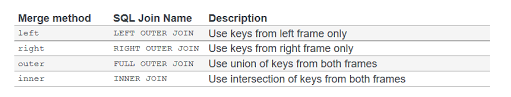

In [94]:
df3 = pd.merge(df1,df2,on="city", how="left", suffixes=('_left','_right')) 
df3

,city,State_left,temperature,State_right,humidity
0,new york,US,21,US,65.0
1,chicago,US,14,US,75.0
2,orlando,US,35,US,68.0
3,baltimore,US,32,NaN,NaN


### 1.3.3 Concat

In pandas, the concat() function is used to concatenate (combine) DataFrames along a particular axis, either vertically or horizontally. It allows you to join multiple DataFrames into a single DataFrame based on their indices or columns. The concat() function is quite flexible and can handle various concatenation scenarios. 

![image.png](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png)

###### Column wise concatenation

In [96]:
result = pd.concat([df1, df2], axis=1, sort=False)
result

,city,State,temperature,city,State,humidity
0,new york,US,21,new york,US,65.0
1,chicago,US,14,orlando,US,68.0
2,orlando,US,35,chicago,US,75.0
3,baltimore,US,32,NaN,NaN,NaN


###### Row-wise concatenation

In [97]:
result = pd.concat([df1, df2], axis=0, sort=False)
result

,city,State,temperature,humidity
0,new york,US,21.0,NaN
1,chicago,US,14.0,NaN
2,orlando,US,35.0,NaN
3,baltimore,US,32.0,NaN
0,new york,US,NaN,65.0
1,orlando,US,NaN,68.0
2,chicago,US,NaN,75.0


## 1.4 Groupby 



`Groupby()` is a powerful function in pandas that allows you to group data in a DataFrame based on one or more columns and then perform various operations on the grouped data. It is particularly useful for data aggregation, transformation, and analysis, especially when dealing with large datasets. The groupby() function is often used in combination with aggregation functions like sum(), mean(), count(), max(), min(), etc., to compute summary statistics for each group.

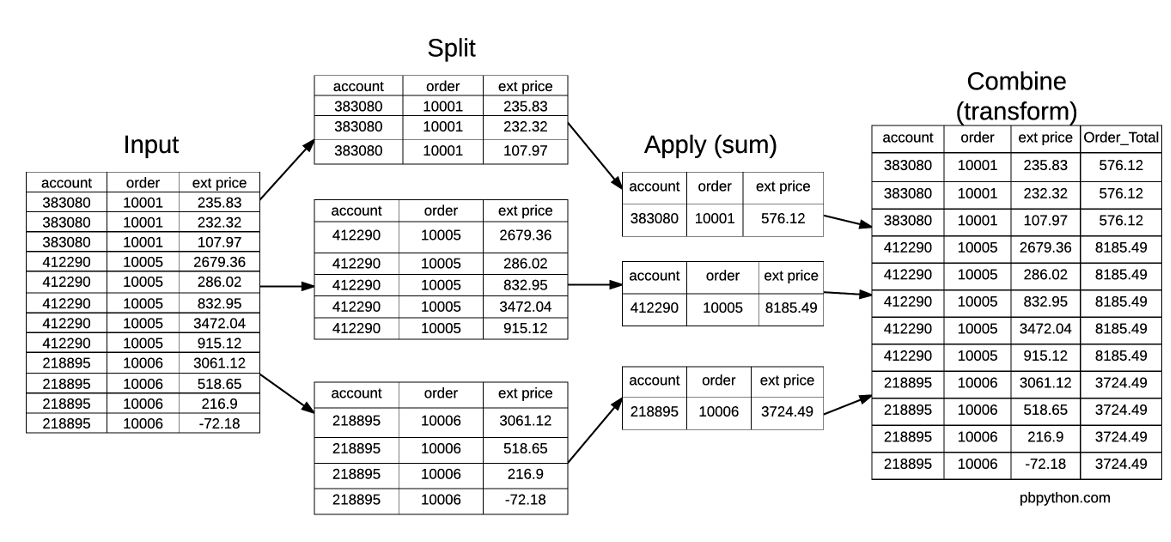

In [99]:
df = pd.read_csv('data\weather_data_groupBy.csv')

In [100]:
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [101]:
# average temperature of all cities
df.groupby('city')['temperature'].mean() 

city
mumbai      88.50
new york    32.25
paris       47.75
Name: temperature, dtype: float64

In [102]:
# maximum windspeed of events
df.groupby('event')['windspeed'].max()

event
Cloudy    13
Fog       15
Rain       6
Snow      12
Sunny     20
Name: windspeed, dtype: int64

In [103]:
# average temperature of city and event
df.groupby(['city','event'])['temperature'].mean()

city      event 
mumbai    Fog       86.000000
          Rain      92.000000
          Sunny     90.000000
new york  Rain      32.000000
          Snow      28.000000
          Sunny     34.500000
paris     Cloudy    48.666667
          Sunny     45.000000
Name: temperature, dtype: float64

In [105]:
# Calculate the average temperature and maximum windspeed of all cities
import numpy as np
df.groupby('city').agg({'temperature':np.mean, 'windspeed':max})

,temperature,windspeed
city,,
mumbai,88.50,15
new york,32.25,12
paris,47.75,20


## 1.5 CrossTab <a id='p1.5' /> 

The crosstab() function in pandas is used to compute a cross-tabulation (also known as a contingency table) of two or more factors (variables). It is a quick way to summarize and analyze the relationship between categorical variables in a DataFrame.

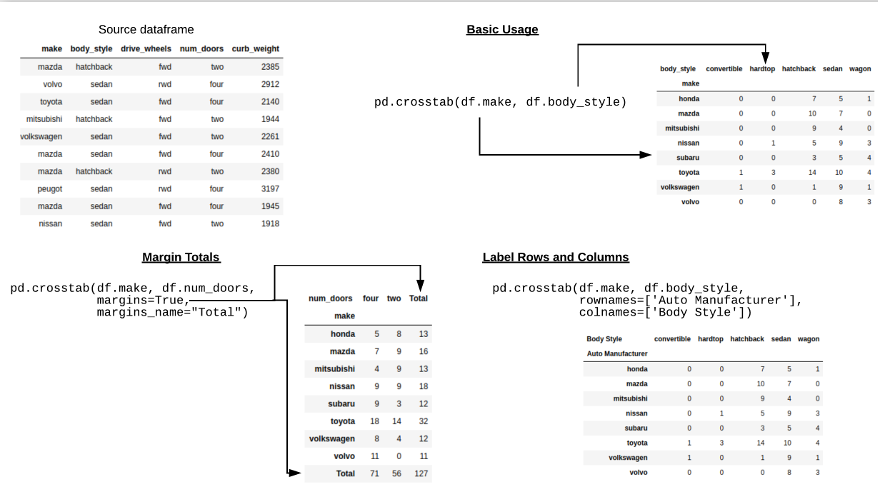

In [106]:

df = pd.read_excel("./data/crosstab_data.xlsx")
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangladesh,Female,31,Left
5,Kadir,Bangladesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [109]:
pd.crosstab(df.Nationality, df.Handedness, margins=True)

Handedness,Left,Right,All
Nationality,,,
Bangladesh,2,0,2
China,2,1,3
India,2,1,3
USA,1,3,4
All,7,5,12


### 1.5.1 Putting multiple fields in one column

In [110]:
pd.crosstab(df.Sex, [df.Handedness, df.Nationality], margins=True)

Handedness        Left                 Right           All
Nationality Bangladesh China India USA China India USA    
Sex                                                       
Female               1     1     0   0     1     0   2   5
Male                 1     1     2   1     0     1   1   7
All                  2     2     2   1     1     1   3  12

### 1.5.2 Calculating Averages in Crosstab

In [115]:
import numpy as np
pd.crosstab(df.Sex, df.Handedness, values=df.Age, aggfunc = np.mean)

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0


## 1.8 Pandas Column Operations

In [118]:
# add 5 to the windspeed column

df['windspeed'] = df['windspeed']+5

df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,11,Rain
1,1/2/2017,new york,36,12,Sunny
2,1/3/2017,new york,28,17,Snow
3,1/4/2017,new york,33,12,Sunny
4,1/1/2017,mumbai,90,10,Sunny
5,1/2/2017,mumbai,85,17,Fog
6,1/3/2017,mumbai,87,20,Fog
7,1/4/2017,mumbai,92,10,Rain
8,1/1/2017,paris,45,25,Sunny
9,1/2/2017,paris,50,18,Cloudy


In [119]:
# use .str to perform string wise operations on pandas dataframe. Convert the cities to uppper case
df['city']=df['city'].str.upper()
df

,day,city,temperature,windspeed,event
0,1/1/2017,NEW YORK,32,11,Rain
1,1/2/2017,NEW YORK,36,12,Sunny
2,1/3/2017,NEW YORK,28,17,Snow
3,1/4/2017,NEW YORK,33,12,Sunny
4,1/1/2017,MUMBAI,90,10,Sunny
5,1/2/2017,MUMBAI,85,17,Fog
6,1/3/2017,MUMBAI,87,20,Fog
7,1/4/2017,MUMBAI,92,10,Rain
8,1/1/2017,PARIS,45,25,Sunny
9,1/2/2017,PARIS,50,18,Cloudy


# 2. [Optional] Hands-On Practice Exercise <a id='p3' />



Consider the below dataframe.

In [ ]:


data = {
    'ID': [1, 2, 3, 4, 5],
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Value1': [10, 20, None, 40, 50],
    'Value2': [100, None, 300, 400, 500],
    'Date': pd.date_range(start='2023-01-01', periods=5, freq='D'),
    'Age': [25, 30, 35, 40, 45],
}

df = pd.DataFrame(data)
df

1. Load the dataset and perform imputation using different techniques like mean and median.

In [ ]:
# Impute missing values with column means
df_imputed_mean = df.fillna(df.mean())
df_imputed_mean


In [ ]:
# Impute missing values with column medians
df_imputed_median = df.fillna(df.median())
df_imputed_median

2. Group the dataset by 'Category' and calculate both sum and mean for 'Value1' and 'Value2'.

In [ ]:
grouped = df.groupby('Category').agg({'Value1': ['sum', 'mean'], 'Value2': ['sum', 'mean']})
grouped

3. Merge the dataset with itself using an inner join based on the 'ID' column.

In [ ]:
inner_join = pd.merge(df, df, on='ID', how='inner', suffixes=('_left', '_right'))
inner_join

4. Select rows where 'Value1' is greater than the mean of 'Value1'.

In [ ]:
selected_rows = df[df['Value1'] > df['Value1'].mean()]
selected_rows

5. Group the dataset by both 'Category' and 'Age' and calculate the sum of 'Value1' for each group.

In [ ]:
grouped = df.groupby(['Category', 'Age']).agg({'Value1': 'sum'})
grouped

6. Create two new DataFrames with the same columns and concatenate them, but only include rows where 'Value1' is greater than 30. 

In [ ]:
df1 = df[df['Value1'] > 30]
df2 = df[df['Value1'] <= 30]

df1

In [ ]:
df2

In [ ]:
concatenated_conditionally = pd.concat([df1, df2], ignore_index=True)
concatenated_conditionally

##### The End
[Back to Content](#tc)

Copyright © 2023 by Boston Consulting Group. All rights reserved.